In [ ]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}!kill -9 -1MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=7c954d73f3d75a3493143da861e04b98124d45616855fe78fb451427a8b86a27
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
Gen RAM Free: 11.4 GB  | Proc size: 1.4 GB
GPU RAM Free: 14792MB | Used: 309MB | Util   2% | Total 15360!kill -9 -1MB


In [ ]:
import datetime
from google.colab import drive
from time import time
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filtered_works = pd.read_csv("/content/drive/MyDrive/NREGAproject/newestfilteredworks.csv", index_col=0, parse_dates=True)
# filtered_works = filtered_works.drop(['workcode', 'work_name', 'sno.', '_merge', 'index', 'work_status', 'bhu_creationtime', 'bhu_serial_no', 'bhu_collection_sno', 'sanction_amount_in(lakh.)'
# ,'total_amount_paid_since_inception_in(lakh.)', 'master_work_category_name', 'total_mandays', 'no._of_units', 'is_secure', 'is_convergence', 'bhu_accuracy', 'bhu_observername'
# ,'bhu_path1', 'bhu_path2', 'agency_name'], axis=1)
filtered_works['district_name'] = filtered_works['district_name'].str.lower()
filtered_works['block_name'] = filtered_works['block_name'].str.lower()
filtered_works['map_gpname'] = filtered_works['map_gpname'].str.lower()
filtered_works['work_physically/_completed_date'] = pd.to_datetime(filtered_works['work_physically/_completed_date'])
filtered_works['work_started_date'] = pd.to_datetime(filtered_works['work_started_date'])
listofgps= filtered_works['map_gpname'].unique()

<ipython-input-2-e313472d227a>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_works['work_physically/_completed_date'] = pd.to_datetime(filtered_works['work_physically/_completed_date'])
<ipython-input-2-e313472d227a>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_works['work_started_date'] = pd.to_datetime(filtered_works['work_started_date'])


In [ ]:
filtered_works['work_started_date'].min()

Timestamp('2002-12-12 00:00:00')

In [ ]:
len(listofgps)

238

In [ ]:
def extractdates(gp):
  gp_lower = gp.lower()
  assetinfo1 = filtered_works[filtered_works['map_gpname'] == gp_lower] #139 rows
  max1 = assetinfo1['work_physically/_completed_date'].max()
  maxdate1 = max1.strftime('%Y-%m-%d')
  maxyr1 = str(max1.year)
  min1 = assetinfo1['work_started_date'].min()
  mindate1 = min1.strftime('%Y-%m-%d')
  minyr1 = str(min1.year)
  month1 = str(min1.month)
  # print(month1)
  # print(minyr1, maxyr1)
  arrmin = mindate1.split('-')
  mindate1 = arrmin[0] + '-' + arrmin[1] + '-01'
  arrmax = maxdate1.split('-')
  maxdate1 = arrmax[0] + '-' + arrmax[1] + '-01'
  # print(mindate1, maxdate1)#dates of availability of assets

  return [minyr1, maxyr1, mindate1, maxdate1]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NREGAproject/autoarimamodularized.csv', index_col=0, parse_dates=True)

In [ ]:
dfr = pd.read_csv('/content/drive/MyDrive/NREGAproject/xgboostmodularized.csv', index_col=0, parse_dates=True)

In [ ]:
dfr[dfr['level'] == 5]

,r2 before,rmse before,mape before,r2 after,rmse after,mape after,t_stat,tpvalue,trend,h,pvaluemk,z,tau,s,var_s,slope,intercept,level
gpname,,,,,,,,,,,,,,,,,,
Kattariguppe,-0.195756,0.145748,203.464447,-0.008446,0.145369,182.217965,-1.593311,0.056463,increasing,True,0.047703,1.980006,0.113597,132.0,4377.333333,0.004508,-0.012407,5
Addagallu,-0.797833,0.164412,339.703336,-0.185648,0.151661,340.197578,0.713787,0.761578,increasing,True,0.037773,2.077308,0.157233,75.0,1269.000000,0.006744,-0.043708,5
Bylanarasapura,0.357263,0.120645,229.722550,-0.140538,0.153415,367.455776,-1.509439,0.066579,increasing,True,0.031666,2.148607,0.128871,129.0,3549.000000,0.005230,-0.007864,5
Venkatagirikote,0.322252,0.140774,4438.204250,-0.047162,0.142582,127.762751,1.446233,0.924966,increasing,True,0.047620,1.980747,0.118881,119.0,3549.000000,0.003873,-0.039743,5


In [ ]:
df[df['level'] == 5]

,r2 before,rmse before,mape before,r2 after,rmse after,mape after,t_stat,tpvalue,trend,h,pvaluemk,z,tau,s,var_s,slope,intercept,level
gpname,,,,,,,,,,,,,,,,,,
Ulavadi,-0.106160,0.197860,1741.705563,0.007919,0.148303,200.245171,-1.444184,7.532132e-02,increasing,True,0.031666,2.148607,0.128871,129.0,3549.000000,0.004958,0.009645,5
Palyakere,0.640912,0.104457,51.012147,-6788.426867,10.391650,11259.637412,-17.941728,9.010362e-47,increasing,True,0.000000,21.561231,0.998319,2376.0,12133.333333,1.121066,-5.352942,5
Bylanarasapura,-0.042559,0.153654,325.344837,-0.014496,0.144690,312.448233,-1.522955,6.487198e-02,increasing,True,0.034427,2.115035,0.126873,127.0,3549.000000,0.004510,0.017368,5
Doddagattiganabbe,0.002684,0.198942,228.024672,0.035734,0.151339,183.318564,-0.844353,1.998664e-01,increasing,True,0.031666,2.148607,0.128871,129.0,3549.000000,0.003552,0.003474,5
Hodali,-0.117364,0.209433,307.167621,0.034502,0.156905,203.267092,-1.496919,6.819222e-02,increasing,True,0.029096,2.182179,0.130869,131.0,3549.000000,0.006856,-0.005340,5
Gownipalli,0.185423,0.118432,172.478855,-0.155791,0.189265,305.885934,-2.186676,1.864149e-02,increasing,True,0.028854,2.185478,0.545455,12.0,25.333333,0.063908,0.019731,5
Thadigol,0.081983,0.138339,206.461509,-0.070487,0.172480,217.574753,-1.851066,3.577686e-02,increasing,True,0.003861,2.889260,0.490196,25.0,69.000000,0.043224,-0.004650,5


In [ ]:
df[df['level'] == 2]

,r2 before,rmse before,mape before,r2 after,rmse after,mape after,t_stat,tpvalue,trend,h,pvaluemk,z,tau,s,var_s,slope,intercept,level
gpname,,,,,,,,,,,,,,,,,,
Bashetnahalli,0.343764,0.113225,109.664290,-0.012645,0.129384,622.167280,-2.103387,0.018443,no trend,False,0.269870,-1.103362,-0.063683,-74.0,4377.333333,-0.001741,0.063111,2
Hirekattigenahalli,-0.000046,0.151735,145.543854,-0.004094,0.139962,1659.084669,-0.839198,0.201262,no trend,False,0.515740,-0.649926,-0.037866,-44.0,4377.333333,-0.001308,0.041709,2
Yellampalli,-0.206650,0.113288,143.998586,-0.021171,0.151975,263.966330,-2.401834,0.008689,no trend,False,0.515740,-0.649926,-0.037866,-44.0,4377.333333,-0.000943,0.067126,2
Mittemari,-0.071548,0.148248,239.590459,-0.027202,0.150314,366.251577,-2.208484,0.014266,no trend,False,0.728115,-0.347635,-0.020654,-24.0,4377.333333,-0.000565,0.060448,2
Pathapalya,-0.092992,0.134215,113.377153,-0.004039,0.145284,956.670267,-1.270603,0.102793,no trend,False,0.891797,-0.136031,-0.008606,-10.0,4377.333333,-0.000519,0.046910,2
Somenahally,-0.014733,0.128998,154.129056,-0.030938,0.145080,193.382257,-2.753739,0.003263,no trend,False,0.535458,-0.619697,-0.036145,-42.0,4377.333333,-0.000920,0.072757,2
Anneswara,-0.023132,0.166124,153.333315,-0.019067,0.126417,136.716206,1.725214,0.956790,no trend,False,0.480803,-0.705012,-0.042957,-43.0,3549.000000,-0.001110,0.015704,2
Bettakote,0.005330,0.179712,549.432349,-0.010466,0.136732,138.513422,1.352595,0.910953,no trend,False,0.814206,-0.235004,-0.014985,-15.0,3549.000000,-0.000926,0.018443,2
Nalluru,0.118758,0.185200,698.918602,0.074945,0.138908,136.573501,0.673858,0.749313,no trend,False,0.788256,-0.268576,-0.016983,-17.0,3549.000000,-0.001261,0.024796,2


In [ ]:
extractdates('Doddagattiganabbe')

['2009', '2022', '2009-01-01', '2022-12-01']

In [ ]:
ndvi = pd.read_csv('/content/drive/MyDrive/NREGAproject/daily-ndvi.csv')
rainfall = pd.read_csv('/content/drive/MyDrive/NREGAproject/cds-precipitation-radiation.csv')

In [ ]:
for gp in listofgps:
    if isinstance(gp, str) and gp.capitalize() in ndvi.columns:
      continue
    else:
      print(gp)

nan
y.hunasenahalli
s.devaganahalli
alooru duddanahalli
kalkunte agrahara
khaji hosahalli
chikka ankandahalli
t.gollahalli
i.basapura
m.gollahalli
g.kothur
k.g.halli
j.thimmasandra


In [ ]:
rainfall = rainfall.drop(['surface_net_solar_radiation', '.geo', 'system:index'], axis=1)
ndvi['date'] = pd.to_datetime(ndvi['date'])

In [ ]:
# def calculate_multi_year_mean(row, df):
#   current_month = row['month']
#   past_multi_year_values = df[(df['month'] == current_month) & (df['year'] < row['year'])]['monthly_NDVI']
#   return past_multi_year_values.mean()

In [ ]:
def preprocessing(gp, rainfall):
  # ndvi = pd.read_csv('/content/drive/MyDrive/NREGAproject/daily-ndvi.csv')
  # rainfall = pd.read_csv('/content/drive/MyDrive/NREGAproject/cds-precipitation-radiation.csv')
  # rainfall.drop(['surface_net_solar_radiation', '.geo', 'system:index'], axis=1)
  global ndvi
  rainfall1 = rainfall.pivot_table(values='total_precipitation', columns='gp', index='date')
  rainfall1.reset_index(inplace= True)
  rainfall1 = rainfall1.rename_axis(None, axis=1)
  rainfall1['date'] = pd.to_datetime(rainfall1['date'], format="%Y-%m-%d").dt.date
  if gp in ndvi.columns:
      ndvi_abludu = ndvi.loc[:, ['date', gp]]
      ndvi_abludu.rename(columns = {gp :'monthly_NDVI'}, inplace = True)
      rainfall_abludu = rainfall1.loc[:, ['date', gp]]
      rainfall_abludu.rename(columns = {gp :'monthly_rainfall'}, inplace = True)
      mylist = extractdates(gp)

      ndvi_abludu['date'] = pd.to_datetime(ndvi_abludu['date'])
      ndvi_albudu = ndvi_abludu.resample('1M', on='date').mean()
      rainfall_abludu['date'] = pd.to_datetime(rainfall_abludu['date'])
      rainfall_abludu = rainfall_abludu.resample('1M', on='date').mean()
      merged = pd.merge(rainfall_abludu, ndvi_abludu, how='outer', on='date').dropna()
      merged['date'] = pd.to_datetime(merged['date'])
      merged.set_index('date', inplace=True)
      # merged.reset_index(inplace = True)
      merged.index = pd.to_datetime(merged.index)
      # merged['hour'] = merged.index.hour
      # merged['dayofweek'] = merged.index.dayofweek
      # merged['quarter'] = merged.index.quarter
      # merged['month'] = merged.index.month
      # merged['year'] = merged.index.year
      # merged['dayofyear'] = merged.index.dayofyear
      #merged['sin_day'] = np.sin(merged.index)
      #merged['cos_day'] = np.cos(merged.index)
      # merged['dayofmonth'] = merged.index.day
      # merged['weekofyear'] = merged.index.weekofyear
      # merged['monthly_rainfall_prev2'] = merged['monthly_rainfall'].shift(2)
      # merged['monthly_NDVI_prev1'] = merged['monthly_NDVI'].shift(1)
      # merged['monthly_NDVI_prev1'].iat[0] = merged['monthly_NDVI_prev1'].iat[1]
      # merged['monthly_rainfall_prev2'].iat[0] = merged['monthly_rainfall'].iat[2]
      # merged['monthly_rainfall_prev2'].iat[1] = merged['monthly_rainfall'].iat[2]

      # Add the multi-year mean as a new column
      # merged['MultiYearMeanNDVI'] = merged.apply(lambda row: calculate_multi_year_mean(row, merged), axis=1)

      ndvi_before =merged[merged.index.year < int(mylist[0])]
      ndvi_after =merged[merged.index.year >= int(mylist[0])]

      return [ndvi_before, ndvi_after]

In [ ]:
!pip install scipy
import scipy.stats as stats

In [ ]:
!pip install pymannkendall
import pymannkendall as mk

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time
from datetime import datetime
from datetime import timedelta

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
import pmdarima as pm

In [ ]:
# databefore = mydatasets[0]
# dataafter = mydatasets[1]

In [ ]:
# X_locked_test = dataafter.drop(columns=['monthly_NDVI'])
# y_locked_test = dataafter['monthly_NDVI']

# # Calculate the index to split the data
# split_index = int(len(databefore) * 0.9)

# # Split the data
# train_data = databefore.iloc[:split_index]
# test_data = databefore.iloc[split_index:]

# # Extract features and target variable for training set
# X_train = train_data.drop(columns=['monthly_NDVI'])
# y_train = train_data['monthly_NDVI']

# # Extract features and target variable for test set
# X_test = test_data.drop(columns=['monthly_NDVI'])
# y_test = test_data['monthly_NDVI']

In [ ]:
#train data: 2000-02-29 to 2014-04-30
#test_data: 2014-05-31 to 2015-12-31
#locked_test_data/dataafter: 2016-01-31 to 2022-05-31

In [ ]:
# train_data.index = pd.DatetimeIndex(train_data.index.values, freq=train_data.index.inferred_freq)
# model = pm.auto_arima(train_data['monthly_NDVI'],m=12,seasonal=True,start_p=0,start_q=0,max_order=5,test='adf',error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)
# model.summary()

# model.fit(train_data['monthly_NDVI'])

In [ ]:
# y_pred =model.predict(n_periods=len(test_data), return_conf_int=True)
# y_pred_df = pd.DataFrame(y_pred[0],index = test_data.index,columns=['y_pred'])
# print(len(y_test))
# print(len(y_pred_df))
# r2 = r2_score(y_test, y_pred_df)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_df))
# mape = np.mean(np.abs((y_test - y_pred_df) / y_test)) * 100

In [ ]:
# y_pred_df.head()

In [ ]:
# dataafter.head()

In [ ]:
#train data: 2000-02-29 to 2014-04-30
#test_data: 2014-05-31 to 2015-12-31
#locked_test_data/dataafter: 2016-01-31 to 2022-05-31

In [ ]:
# y_locked_pred = model.predict(n_periods=len(dataafter)+len(test_data), return_conf_int=True)
# y_locked_pred_df = pd.DataFrame(y_locked_pred[0], index =dataafter.index, columns=['y_locked_pred'])

In [ ]:
def autoarimamodel(databefore, dataafter):
  # Extract features and target variable
  # X = databefore.drop(columns=['monthly_NDVI'])
  # y = databefore['monthly_NDVI']
  X_locked_test = dataafter.drop(columns=['monthly_NDVI'])
  y_locked_test = dataafter['monthly_NDVI']

  # Calculate the index to split the data
  split_index = int(len(databefore) * 0.9)

  # Split the data
  train_data = databefore.iloc[:split_index]
  test_data = databefore.iloc[split_index:]

  # Extract features and target variable for training set
  X_train = train_data.drop(columns=['monthly_NDVI'])
  y_train = train_data['monthly_NDVI']

  # Extract features and target variable for test set
  X_test = test_data.drop(columns=['monthly_NDVI'])
  y_test = test_data['monthly_NDVI']

  train_data.index = pd.DatetimeIndex(train_data.index.values, freq=train_data.index.inferred_freq)
  model = pm.auto_arima(train_data['monthly_NDVI'],m=12,seasonal=True,start_p=0,start_q=0,max_order=5,test='adf',error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)
  model.summary()

  model.fit(train_data['monthly_NDVI'])

  y_pred =model.predict(n_periods=len(test_data), return_conf_int=True)
  y_pred_df = pd.DataFrame(y_pred[0],index = test_data.index,columns=['y_pred'])

  r2 = r2_score(y_test, y_pred_df['y_pred'])
  rmse = np.sqrt(mean_squared_error(y_test, y_pred_df['y_pred']))
  mape = np.mean(np.abs((y_test - y_pred_df['y_pred']) / y_test)) * 100

  # Print the evaluation metrics
  # print(f'R2 Score: {r2}')
  # print(f'RMSE: {rmse}')
  # print(f'MAPE: {mape}')
  y_locked_pred = model.predict(n_periods=len(dataafter)+len(test_data), return_conf_int=True)
  y_locked_pred_df = pd.DataFrame(y_locked_pred[0], index =dataafter.index, columns=['y_locked_pred'])

  rmseafter = mean_squared_error(y_locked_test, y_locked_pred_df['y_locked_pred'], squared=False)
  r2after = r2_score(y_locked_test, y_locked_pred_df['y_locked_pred'])
  mapeafter = np.mean(np.abs((y_locked_test - y_locked_pred_df['y_locked_pred']) / y_locked_test)) * 100

  # print(f'after MAPE: {mapeafter}')
  # print(f'after RMSE: {rmseafter}')
  # print(f'after R2 Score: {r2after}')

  #test is with the assets so should be higher. pred is without the assets so should be lower
  #‘less’: the mean of the distribution underlying the first sample (pred) is less than the mean of the distribution underlying the second sample (test).
  # print(y_locked_pred_df.isna().any())
  # print(y_locked_pred_df.shape) (77,1)
  # print(y_locked_test.shape) (77,)
  # print(y_pred_df.shape) (20,1)
  # print(y_test.shape) (20,)
  t_stat, tpvalue = stats.ttest_rel(y_locked_pred_df['y_locked_pred'], y_locked_test, alternative='less')
  # print('t-statistics:',t_stat, '\np-value:', tpvalue)

  difference = y_locked_test - y_locked_pred_df['y_locked_pred'] #should be positive
  mkres = mk.seasonal_test(difference)

  senslope = mkres.slope
  zstat = mkres.z

  if senslope >= 0.0005 and zstat >= 1.96:
      level = 5
  elif senslope >= 0.0005 and abs(zstat) < 1.96:
      level = 4
  elif abs(senslope) < 0.0005 and abs(zstat) < 1.96:
      level = 3
  elif senslope < -0.0005 and abs(zstat) < 1.96:
      level = 2
  elif senslope < -0.0005 and zstat <= -1.96:
      level = 1
  else:
      level = 0

  return [r2, rmse, mape, r2after, rmseafter, mapeafter, t_stat, tpvalue, mkres.trend, mkres.h, mkres.p, mkres.z, mkres.Tau, mkres.s, mkres.var_s, mkres.slope, mkres.intercept, level]

In [ ]:
def dumbautoarimamodel(databefore, dataafter):
  # Extract features and target variable
  # X = databefore.drop(columns=['monthly_NDVI'])
  # y = databefore['monthly_NDVI']
  X_locked_test = dataafter.drop(columns=['monthly_NDVI'])
  y_locked_test = dataafter['monthly_NDVI']

  # Calculate the index to split the data
  split_index = int(len(databefore) * 0.9)

  # Split the data
  train_data = databefore.iloc[:split_index]
  test_data = databefore.iloc[split_index:]

  # Extract features and target variable for training set
  X_train = train_data.drop(columns=['monthly_NDVI'])
  y_train = train_data['monthly_NDVI']

  # Extract features and target variable for test set
  X_test = test_data.drop(columns=['monthly_NDVI'])
  y_test = test_data['monthly_NDVI']

  train_data.index = pd.DatetimeIndex(train_data.index.values, freq=train_data.index.inferred_freq)
  model = pm.auto_arima(train_data['monthly_NDVI'],m=12,seasonal=True,start_p=0,start_q=0,max_order=5,test='adf',error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)
  model.summary()

  model.fit(train_data['monthly_NDVI'])

  y_pred =model.predict(n_periods=len(test_data), return_conf_int=True)
  y_pred_df = pd.DataFrame(y_pred[0],index = test_data.index,columns=['y_pred'])

  r2 = r2_score(y_test, y_pred_df['y_pred'])
  rmse = np.sqrt(mean_squared_error(y_test, y_pred_df['y_pred']))
  mape = np.mean(np.abs((y_test - y_pred_df['y_pred']) / y_test)) * 100

  # Print the evaluation metrics
  # print(f'R2 Score: {r2}')
  # print(f'RMSE: {rmse}')
  # print(f'MAPE: {mape}')
  y_locked_pred = model.predict(n_periods=len(dataafter)+len(test_data), return_conf_int=True)
  y_locked_pred_df = pd.DataFrame(y_locked_pred[0], index =dataafter.index, columns=['y_locked_pred'])

  rmseafter = mean_squared_error(y_locked_test, y_locked_pred_df['y_locked_pred'], squared=False)
  r2after = r2_score(y_locked_test, y_locked_pred_df['y_locked_pred'])
  mapeafter = np.mean(np.abs((y_locked_test - y_locked_pred_df['y_locked_pred']) / y_locked_test)) * 100

  # print(f'after MAPE: {mapeafter}')
  # print(f'after RMSE: {rmseafter}')
  # print(f'after R2 Score: {r2after}')

  #test is with the assets so should be higher. pred is without the assets so should be lower
  #‘less’: the mean of the distribution underlying the first sample (pred) is less than the mean of the distribution underlying the second sample (test).
  # print(y_locked_pred_df.isna().any())
  # print(y_locked_pred_df.shape) (77,1)
  # print(y_locked_test.shape) (77,)
  # print(y_pred_df.shape) (20,1)
  # print(y_test.shape) (20,)
  t_stat, tpvalue = stats.ttest_rel(y_locked_pred_df['y_locked_pred'], y_locked_test, alternative='less')
  # print('t-statistics:',t_stat, '\np-value:', tpvalue)

  difference = y_locked_test - y_locked_pred_df['y_locked_pred'] #should be positive

  with plt.style.context(['seaborn-colorblind', 'seaborn-paper']):
    plt.plot(X_locked_test.index.values, difference)
    plt.legend()
    # ax.figure.tight_layout()
    plt.ylabel("Difference in NDVI post-intervention", rotation=90, fontsize=11)
    plt.xlabel("years after asset creation", rotation=0,fontsize=11)

    plt.savefig('arimadifff.svg', format='svg', bbox_inches='tight')
    from google.colab import files
    files.download("arimadifff.svg")

  # mkres = mk.seasonal_test(difference)

  # senslope = mkres.slope
  # zstat = mkres.z

  # if senslope >= 0.0005 and zstat >= 1.96:
  #     level = 5
  # elif senslope >= 0.0005 and abs(zstat) < 1.96:
  #     level = 4
  # elif abs(senslope) < 0.0005 and abs(zstat) < 1.96:
  #     level = 3
  # elif senslope < -0.0005 and abs(zstat) < 1.96:
  #     level = 2
  # elif senslope < -0.0005 and zstat <= -1.96:
  #     level = 1
  # else:
  #     level = 0

  # return [r2, rmse, mape, r2after, rmseafter, mapeafter, t_stat, tpvalue, mkres.trend, mkres.h, mkres.p, mkres.z, mkres.Tau, mkres.s, mkres.var_s, mkres.slope, mkres.intercept, level]

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-157.868, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-147.957, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-150.237, Time=0.74 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-148.679, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=71.992, Time=0.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-150.624, Time=0.27 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-152.236, Time=0.50 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=-155.904, Time=2.48 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=-156.016, Time=1.94 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-154.146, Time=0.60 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-155.125, Time=0.97 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-156.657, Time=0.86 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-156.486, Time=1.35 sec
 ARIMA(1,0,1)(1,0,1)[12] i

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

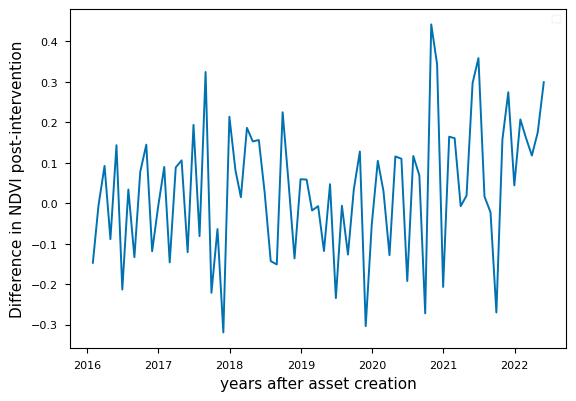

In [ ]:
gp = 'Addagal'
gp = gp.capitalize()
mydatasets = preprocessing(gp, rainfall)
myvals = dumbautoarimamodel(mydatasets[0], mydatasets[1])

In [ ]:
# df = pd.DataFrame(columns=['gpname','r2 before','rmse before', 'mape before', 'r2 after', 'rmse after', 'mape after', 't_stat', 'tpvalue', 'trend', 'h', 'pvaluemk', 'z', 'tau', 's', 'var_s', 'slope', 'intercept', 'level'])
# df.loc[len(df.index)] = [gp, myvals[0], myvals[1], myvals[2], myvals[3], myvals[4], myvals[5], myvals[6], myvals[7], myvals[8], myvals[9], myvals[10], myvals[11], myvals[12], myvals[13], myvals[14], myvals[15], myvals[16], myvals[17]]

In [ ]:
# df

,gpname,r2 before,rmse before,mape before,r2 after,rmse after,mape after,t_stat,tpvalue,trend,h,pvaluemk,z,tau,s,var_s,slope,intercept,level
0,Addagal,-0.122746,0.144544,126.068808,-0.003159,0.168125,273.667939,-1.663669,0.050149,increasing,True,0.009706,2.586135,0.257143,54.0,420.0,0.023941,-0.032102,5


In [ ]:
df = pd.DataFrame(columns=['gpname','r2 before','rmse before', 'mape before', 'r2 after', 'rmse after', 'mape after', 't_stat', 'tpvalue', 'trend', 'h', 'pvaluemk', 'z', 'tau', 's', 'var_s', 'slope', 'intercept', 'level'])
#r2, rmse, mape, r2after, rmseafter, mapeafter, t_stat, tpvalue, mkres.trend, mkres.h, mkres.p, mkres.z, mkres.Tau, mkres.s, mkres.var_s, mkres.slope, mkres.intercept, level
for gp in listofgps:
  if isinstance(gp, str):
    gp = gp.capitalize()
    mydatasets = preprocessing(gp, rainfall)
    if mydatasets is None:
      continue
    else:
      myvals = autoarimamodel(mydatasets[0], mydatasets[1])
      df.loc[len(df.index)] = [gp, myvals[0], myvals[1], myvals[2], myvals[3], myvals[4], myvals[5], myvals[6], myvals[7], myvals[8], myvals[9], myvals[10], myvals[11], myvals[12], myvals[13], myvals[14], myvals[15], myvals[16], myvals[17]]

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-100.299, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-102.068, Time=1.00 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-101.790, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=22.644, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-98.940, Time=0.10 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-100.385, Time=1.37 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-100.428, Time=1.35 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-101.746, Time=1.07 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=4.79 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-103.876, Time=1.36 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-102.273, Time=3.39 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-103.484, Time=0.18 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (8) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=13.083, Time=0.17 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=9.083, Time=0.06 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=8.698, Time=0.27 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=6.699, Time=0.15 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=8.700, Time=0.29 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=10.698, Time=0.57 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=7.884, Time=0.22 sec
 ARIMA(0,2,2)(0,1,0)[12]             : AIC=6.626, Time=0.32 sec
 ARIMA(0,2,2)(1,1,0)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,2,2)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,2,2)(0,1,0)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,3)(0,1,0)[12]             : AIC=8.626, Time=0.21 sec
 ARIMA(1,2,3)(0,1,0)[12]             : AIC=10.547, Time=0.30 sec
 ARI

In [ ]:
df.tail()

,gpname,r2 before,rmse before,mape before,r2 after,rmse after,mape after,t_stat,tpvalue,trend,h,pvaluemk,z,tau,s,var_s,slope,intercept,level
220,Chaldiganahalli,0.010304,0.149364,191.675335,-0.158793,0.188242,148.969045,-2.271962,0.015483,no trend,False,0.551149,0.59604,0.181818,4.0,25.333333,0.031769,0.068947,4
221,Abbenahalli,0.236054,0.128261,128.161496,0.039268,0.151148,476.405846,-1.343131,0.095008,no trend,False,1.000000,0.00000,0.000000,0.0,25.333333,-0.001775,0.090590,2
222,Soolikunte,0.180964,0.151821,188.833876,0.078470,0.147971,226.513748,-0.471645,0.319871,no trend,False,0.148562,1.44463,0.254902,13.0,69.000000,0.028024,0.003504,4
223,Mavahalli,-0.113219,0.163640,290.452281,0.242775,0.117172,55.934887,-1.049296,0.154817,no trend,False,1.000000,0.00000,0.200000,1.0,5.000000,0.008938,0.053435,4
224,Madivala,0.188263,0.158469,177.079383,0.097307,0.152623,292.988856,-0.716705,0.238382,no trend,False,0.453255,0.75000,0.108696,10.0,144.000000,0.008434,0.037551,4


In [ ]:
df[(df['r2 before'] > df['r2 after']) & (df['rmse before'] < 0.15) & (df['rmse before'] < df['rmse after'])].count()

gpname         61
r2 before      61
rmse before    61
mape before    61
r2 after       61
rmse after     61
mape after     61
t_stat         61
tpvalue        61
trend          61
h              61
pvaluemk       61
z              61
tau            61
s              61
var_s          61
slope          61
intercept      61
level          61
dtype: int64

In [ ]:
df[(df['rmse before'] < 0.15) & (df['rmse before'] < df['rmse after']) & (df['level'] >= 4)].count()

gpname         54
r2 before      54
rmse before    54
mape before    54
r2 after       54
rmse after     54
mape after     54
t_stat         54
tpvalue        54
trend          54
h              54
pvaluemk       54
z              54
tau            54
s              54
var_s          54
slope          54
intercept      54
level          54
dtype: int64

In [ ]:
df[df['tpvalue'] < 0.05].count()

gpname         89
r2 before      89
rmse before    89
mape before    89
r2 after       89
rmse after     89
mape after     89
t_stat         89
tpvalue        89
trend          89
h              89
pvaluemk       89
z              89
tau            89
s              89
var_s          89
slope          89
intercept      89
level          89
dtype: int64

In [ ]:
df[df['level'] >= 4].count()

gpname         142
r2 before      142
rmse before    142
mape before    142
r2 after       142
rmse after     142
mape after     142
t_stat         142
tpvalue        142
trend          142
h              142
pvaluemk       142
z              142
tau            142
s              142
var_s          142
slope          142
intercept      142
level          142
dtype: int64

In [ ]:
# Assuming df is your DataFrame
df.to_csv('/content/drive/MyDrive/NREGAproject/autoarimamodularizedfinal.csv', index=False)

In [ ]:
df[df['level'] == 5].count()

gpname         7
r2 before      7
rmse before    7
mape before    7
r2 after       7
rmse after     7
mape after     7
t_stat         7
tpvalue        7
trend          7
h              7
pvaluemk       7
z              7
tau            7
s              7
var_s          7
slope          7
intercept      7
level          7
dtype: int64

In [ ]:
df[df['level'] == 4].count()

gpname         158
r2 before      158
rmse before    158
mape before    158
r2 after       158
rmse after     158
mape after     158
t_stat         158
tpvalue        158
trend          158
h              158
pvaluemk       158
z              158
tau            158
s              158
var_s          158
slope          158
intercept      158
level          158
dtype: int64

In [ ]:
df[df['level'] == 3].count()

gpname         38
r2 before      38
rmse before    38
mape before    38
r2 after       38
rmse after     38
mape after     38
t_stat         38
tpvalue        38
trend          38
h              38
pvaluemk       38
z              38
tau            38
s              38
var_s          38
slope          38
intercept      38
level          38
dtype: int64

In [ ]:
df[df['level'] == 2].count()

gpname         22
r2 before      22
rmse before    22
mape before    22
r2 after       22
rmse after     22
mape after     22
t_stat         22
tpvalue        22
trend          22
h              22
pvaluemk       22
z              22
tau            22
s              22
var_s          22
slope          22
intercept      22
level          22
dtype: int64

In [ ]:
df[df['level'] == 1].count()

gpname         0
r2 before      0
rmse before    0
mape before    0
r2 after       0
rmse after     0
mape after     0
t_stat         0
tpvalue        0
trend          0
h              0
pvaluemk       0
z              0
tau            0
s              0
var_s          0
slope          0
intercept      0
level          0
dtype: int64

In [ ]:
df[df['level'] == 0].count()

gpname         0
r2 before      0
rmse before    0
mape before    0
r2 after       0
rmse after     0
mape after     0
t_stat         0
tpvalue        0
trend          0
h              0
pvaluemk       0
z              0
tau            0
s              0
var_s          0
slope          0
intercept      0
level          0
dtype: int64

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NREGAproject/autoarimamodularized.csv', index_col=0, parse_dates=True)

In [ ]:
dfa = pd.read_csv('/content/drive/MyDrive/NREGAproject/xgboostmodularized.csv', index_col=0, parse_dates=True)

In [ ]:
df1 = df[(df['r2 before'] > df['r2 after']) & (df['rmse before'] < 0.15) & (df['rmse before'] < df['rmse after']) & (df['level'] >= 4)]

In [ ]:
df2 = dfa[(dfa['r2 before'] > dfa['r2 after']) & (dfa['rmse before'] < 0.15) & (dfa['rmse before'] < dfa['rmse after']) & (dfa['level'] >= 4)]

In [ ]:
df[(df['r2 before'] > df['r2 after']) & (df['rmse before'] < 0.15) & (df['rmse before'] < df['rmse after']) & (df['level'] >= 4)].count()

r2 before      45
rmse before    45
mape before    45
r2 after       45
rmse after     45
mape after     45
t_stat         45
tpvalue        45
trend          45
h              45
pvaluemk       45
z              45
tau            45
s              45
var_s          45
slope          45
intercept      45
level          45
dtype: int64

In [ ]:
dfa[(dfa['r2 before'] > dfa['r2 after']) & (dfa['rmse before'] < 0.15) & (dfa['rmse before'] < dfa['rmse after']) & (dfa['level'] >= 4)].count()

r2 before      41
rmse before    41
mape before    41
r2 after       41
rmse after     41
mape after     41
t_stat         41
tpvalue        41
trend          41
h              41
pvaluemk       41
z              41
tau            41
s              41
var_s          41
slope          41
intercept      41
level          41
dtype: int64

In [ ]:
dfa

,r2 before,rmse before,mape before,r2 after,rmse after,mape after,t_stat,tpvalue,trend,h,pvaluemk,z,tau,s,var_s,slope,intercept,level
gpname,,,,,,,,,,,,,,,,,,
Abludu,-0.162818,0.157331,177.170844,-0.103507,0.156201,175.263952,-2.599726,0.005070,no trend,False,0.477466,0.710384,0.041308,48.0,4377.333333,0.002022,0.013949,4
Anur,0.445849,0.137899,2130.211632,-0.112119,0.159067,123.336753,-1.184175,0.119050,no trend,False,0.523560,-0.637868,-0.038961,-39.0,3549.000000,-0.001927,0.023673,2
Baktharahalli,0.462569,0.155664,1824.075946,-0.053697,0.160567,133.220328,1.163936,0.876909,no trend,False,0.480803,0.705012,0.042957,43.0,3549.000000,0.001973,-0.008579,4
Bashetnahalli,-0.153647,0.150123,113.613215,0.010359,0.127906,793.314946,-1.547259,0.061819,no trend,False,0.372522,-0.891758,-0.051635,-60.0,4377.333333,-0.001430,0.032677,2
Chimangala,0.514903,0.132991,326.712364,-0.114947,0.157172,141.114279,0.072085,0.528688,no trend,False,0.893175,-0.134288,-0.008991,-9.0,3549.000000,-0.000232,0.007756,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mindigal,0.214463,0.113108,87.968995,-0.188149,0.143247,202.625194,-1.886938,0.031233,no trend,False,0.267257,1.109400,0.101045,29.0,637.000000,0.009454,-0.002544,4
Mittahalli,0.166765,0.129420,133.691476,-0.006134,0.143474,332.588669,0.668674,0.747700,no trend,False,0.496407,0.680155,0.039587,46.0,4377.333333,0.001622,-0.013968,4
Mandibele,-0.368433,0.169926,44.072577,-0.233154,0.179622,97.004201,-2.647204,0.004931,increasing,True,0.045436,2.000595,0.200000,42.0,420.000000,0.012958,0.015309,5


In [ ]:
common_group_names = pd.merge(df1, df2, on='gpname', how='inner')

In [ ]:
len(common_group_names)

11

In [ ]:
df[(df['r2 before'] > df['r2 after'])].count()

r2 before      96
rmse before    96
mape before    96
r2 after       96
rmse after     96
mape after     96
t_stat         96
tpvalue        96
trend          96
h              96
pvaluemk       96
z              96
tau            96
s              96
var_s          96
slope          96
intercept      96
level          96
dtype: int64

In [ ]:
df[ (df['rmse before'] < df['rmse after'])].count()

r2 before      82
rmse before    82
mape before    82
r2 after       82
rmse after     82
mape after     82
t_stat         82
tpvalue        82
trend          82
h              82
pvaluemk       82
z              82
tau            82
s              82
var_s          82
slope          82
intercept      82
level          82
dtype: int64

In [ ]:
df[df['level'] == 0]

,r2 before,rmse before,mape before,r2 after,rmse after,mape after,t_stat,tpvalue,trend,h,pvaluemk,z,tau,s,var_s,slope,intercept,level
gpname,,,,,,,,,,,,,,,,,,
